In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import RandomState
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

In [3]:
display(df_train.head(2))
display(df_test.head(2))
display(df_full.head(2))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [4]:
display(df_train.shape)
display(df_test.shape)
display(df_full.shape)

(16860, 86)

(5856, 52)

(22716, 86)

#### Analisis de duplicados

In [5]:
# Filas duplicadas

print('Duplicados en train:', df_train.duplicated().sum())
print('Duplicados en test:', df_test.duplicated().sum())
print('Duplicados en full:', df_full.duplicated().sum())

Duplicados en train: 16
Duplicados en test: 6
Duplicados en full: 22


In [6]:
# Eliminacion de duplicados
df_train = df_train.drop_duplicates().reset_index(drop=True)
df_test = df_test.drop_duplicates().reset_index(drop=True)
df_full = df_full.drop_duplicates().reset_index(drop=True)

In [7]:
def recuperacion(c, f, t):

    recuperacion = ((c * (f - t)) / (f * (c - t))) * 100

    return recuperacion

c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

df_formula = df_train.copy()
df_formula['formula'] = recuperacion(c, f, t)

In [8]:
MAE = df_formula['rougher.output.recovery'] - df_formula['formula']
MAE = MAE.abs().mean()
print("La diferencia entre el valor esperado y el valor medido es de", MAE)

La diferencia entre el valor esperado y el valor medido es de 9.303415616264301e-15


In [9]:
# El error absoluto medio es muy cercano a cero, lo que significa que no nos debemos preocupar por un sanity.

In [10]:
# Analisis de features no presentes en el set de prueba

col_train = df_train.columns.tolist()
col_test = df_test.columns.tolist()

features_not_in_test = []
for x in col_train:
    if x not in col_test:
        features_not_in_test.append(x)

print("Columnas que no están en el set de prueba:")  #
features_not_in_test

Columnas que no están en el set de prueba:


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [11]:
# Llenar valores nulos utilizando SimpleImputer

imp = SimpleImputer()

imp_df_train = pd.DataFrame(imp.fit_transform(df_train))
imp_df_train.columns = df_train.columns
imp_df_train.index = df_train.index

df_train_nulls = df_train.isnull().sum()
imp_df_train_nulls = imp_df_train.isnull().sum()

print("Valores nulos del set de entranmiento antes de usar simpleimputer", (df_train_nulls > 0).sum()) 
print("Valores nulos después de usar simpleimputer", (imp_df_train_nulls > 0).sum()) 

imp_df_full = pd.DataFrame(imp.transform(df_full))
imp_df_full.columns = df_full.columns
imp_df_full.index = df_full.index

df_full_nulls = df_full.isnull().sum()
imp_df_full_nulls = imp_df_full.isnull().sum()

print("Valores nulos del set completo antes de usar simpleimputer", (df_full_nulls > 0).sum())
print("Valores nulos después de usar simpleimputer", (imp_df_full_nulls > 0).sum())

imp_df_test = imp_df_full.loc[df_test.index, df_test.columns]

Valores nulos del set de entranmiento antes de usar simpleimputer 85
Valores nulos después de usar simpleimputer 0
Valores nulos del set completo antes de usar simpleimputer 85
Valores nulos después de usar simpleimputer 0


#### Analisis de datos

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


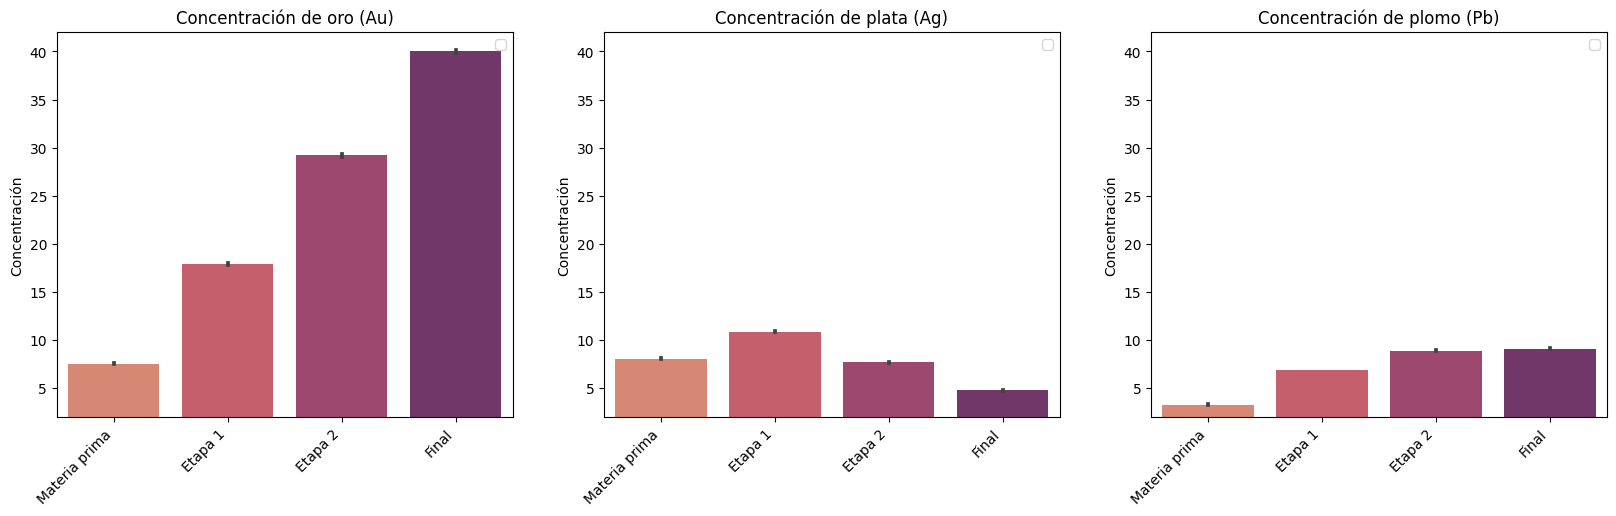

In [12]:
# Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación

au_concentracion = [
    "rougher.input.feed_au",
    "rougher.output.concentrate_au",
    "primary_cleaner.output.concentrate_au",
    "final.output.concentrate_au",
]
ag_concentracion = [
    "rougher.input.feed_ag",
    "rougher.output.concentrate_ag",
    "primary_cleaner.output.concentrate_ag",
    "final.output.concentrate_ag",
]
pb_concentracion = [
    "rougher.input.feed_pb",
    "rougher.output.concentrate_pb",
    "primary_cleaner.output.concentrate_pb",
    "final.output.concentrate_pb",
]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i in range(3):
    if i == 0:
        ax[i].set_title("Concentración de oro (Au)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[au_concentracion], ax=ax[i], palette="flare")
    elif i == 1:
        ax[i].set_title("Concentración de plata (Ag)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[ag_concentracion], ax=ax[i], palette="flare")
    else:
        ax[i].set_title("Concentración de plomo (Pb)")
        ax[i].set_ylabel("Concentración")
        sns.barplot(data=imp_df_full[pb_concentracion], ax=ax[i], palette="flare")
    ax[i].set_xticklabels(
        labels=["Materia prima", "Etapa 1", "Etapa 2", "Final"],
        rotation=45,
        ha="right",
    )
    ax[i].set_ylim(2, 42)
    ax[i].legend()

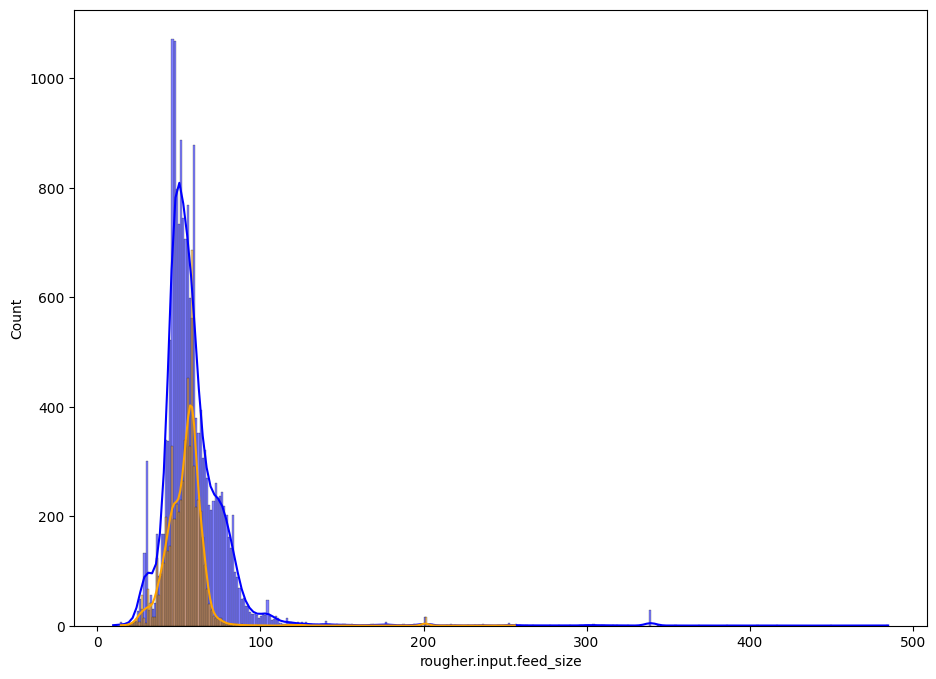

In [13]:
# Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.

data1 = imp_df_train["rougher.input.feed_size"]
data2 = imp_df_test["rougher.input.feed_size"]

plt.figure(figsize=(11, 8))

sns.histplot(data1, color="blue", label="Train", kde=True)
sns.histplot(data2, color="orange", label="Test", kde=True)

plt.show()

In [14]:
# Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.

imp_df_full["total_feed_concentrate"] = imp_df_full[[
    "rougher.input.feed_au",
    "rougher.input.feed_ag",
    "rougher.input.feed_pb",
    "rougher.input.feed_sol"
]].sum(axis=1)

imp_df_full["total_rougher_concentrate"] = imp_df_full[[
    "rougher.output.concentrate_au",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_sol"
]].sum(axis=1)

imp_df_full["total_final_concentrate"] = imp_df_full[[
    "final.output.concentrate_au",
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol"
]].sum(axis=1)

display(imp_df_full[[
    "total_feed_concentrate",
    "total_rougher_concentrate",
    "total_final_concentrate"]].head(2))

,total_feed_concentrate,total_rougher_concentrate,total_final_concentrate
0,51.680034,66.42495,63.644396
1,50.659114,67.01271,63.957723


Text(0, 0.5, 'Frecuencia')

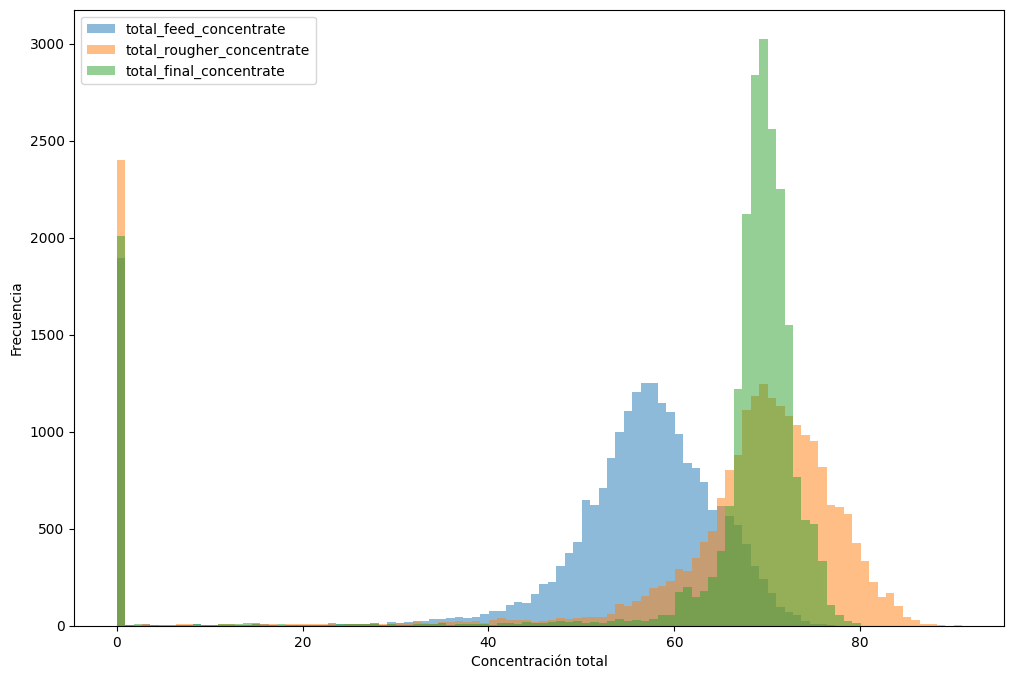

In [15]:
imp_df_full[[
    "total_feed_concentrate",
    "total_rougher_concentrate",
    "total_final_concentrate"]].plot(kind="hist", alpha=0.5, bins=100, figsize=(12, 8))

plt.xlabel("Concentración total")
plt.ylabel("Frecuencia")

In [16]:
# Eliminación de valores anómalos

columns = [
    "total_feed_concentrate",
    "total_rougher_concentrate",
    "total_final_concentrate"
]

imp_df_full = imp_df_full[(imp_df_full[columns] != 0).all(axis=1)].reset_index(drop=True)

#### Construye un modelo

In [17]:
# Escribe una función para calcular el valor final de sMAPE

def smape(y, y_pred):
    numerator = abs(y - y_pred)
    denominator = (abs(y) + abs(y_pred)) / 2
    smape = sum(numerator / denominator) * 100 / len(y)
    return smape

In [18]:
# Entrena diferentes modelos

features = df_test.columns
features_rougher = [x for x in features if "rougher" in x.split(".")]

features_rougher

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']

In [19]:
x_train_rougher = imp_df_train[features_rougher].reset_index(drop=True)
y_train_rougher = imp_df_train["rougher.output.recovery"].reset_index(drop=True)

x_train_final = imp_df_train[features].reset_index(drop=True)
y_train_final = imp_df_train["final.output.recovery"].reset_index(drop=True)

In [20]:
# Estandarización de datos

scaler = StandardScaler()

x_train_rougher = scaler.fit_transform(x_train_rougher)
x_train_final = scaler.fit_transform(x_train_final)

#### Estandarizacion de datos

In [21]:
state = RandomState(12345)

# Model 1: Linear Regression
lr_params = {
        'fit_intercept': [True, False]
    }

# Model 2: Random Forest Regressor
rf_params = {
        'n_estimators': [5, 10, 25, 50],
        'max_depth': [None, 10, 20, 30],
    }

In [22]:
models = {
        'LinearRegression': LinearRegression(),
        'RandomForestRegressor': RandomForestRegressor(random_state=state)
    }

param_grids = {
        'LinearRegression': lr_params,
        'RandomForestRegressor': rf_params
    }

best_estimators = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_rougher = GridSearchCV(estimator=model,
                                   param_grid=param_grids[name],
                                   scoring='neg_mean_squared_error', 
                                   cv=5,
                                   n_jobs=-1)
    grid_rougher.fit(x_train_rougher, y_train_rougher)
    best_estimators[name] = grid_rougher.best_estimator_
        
    print(f"Best parameters for {name}: {grid_rougher.best_params_}")
    print(f"Best negative MSE for {name}: {grid_rougher.best_score_}\n")

results = pd.DataFrame(grid_rougher.cv_results_)
display(results.sort_values("rank_test_score"))

Running GridSearchCV for LinearRegression...
Best parameters for LinearRegression: {'fit_intercept': True}
Best negative MSE for LinearRegression: -199.3554808940631

Running GridSearchCV for RandomForestRegressor...
Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 50}
Best negative MSE for RandomForestRegressor: -205.55278685203228



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,6.503243,0.108031,0.006850,0.000431,10,50,"{'max_depth': 10, 'n_estimators': 50}",-139.547931,-91.189369,-357.800732,-349.575877,-89.650026,-205.552787,122.303859,1
6,3.272748,0.060554,0.004041,0.000299,10,25,"{'max_depth': 10, 'n_estimators': 25}",-140.358116,-90.709570,-352.474770,-349.074707,-99.126477,-206.348728,119.119530,2
5,1.309811,0.025907,0.002134,0.000123,10,10,"{'max_depth': 10, 'n_estimators': 10}",-147.565303,-87.677307,-357.373811,-359.736401,-118.322651,-214.135095,119.432160,3
15,10.979941,0.442692,0.017492,0.001549,30,50,"{'max_depth': 30, 'n_estimators': 50}",-140.575133,-99.296123,-361.067632,-356.663010,-123.895894,-216.299558,117.151290,4
3,11.119497,0.527181,0.015979,0.001062,None,50,"{'max_depth': None, 'n_estimators': 50}",-140.283936,-97.406829,-375.791349,-351.535170,-119.465655,-216.896588,120.843023,5
11,10.091203,0.291573,0.013905,0.000977,20,50,"{'max_depth': 20, 'n_estimators': 50}",-140.655948,-105.791609,-363.259675,-356.624649,-118.540043,-216.974385,117.283431,6
10,5.071100,0.141500,0.007884,0.000566,20,25,"{'max_depth': 20, 'n_estimators': 25}",-141.733156,-103.349804,-356.909177,-357.597279,-137.070017,-219.331887,113.388933,7
4,0.657495,0.017265,0.001535,0.000055,10,5,"{'max_depth': 10, 'n_estimators': 5}",-150.451992,-94.063127,-363.640356,-366.300186,-123.800894,-219.651311,119.989148,8
2,5.575906,0.253117,0.009623,0.001654,None,25,"{'max_depth': None, 'n_estimators': 25}",-140.293110,-99.709273,-369.414318,-349.732849,-139.832439,-219.796398,115.243159,9
14,5.525157,0.236370,0.010490,0.002254,30,25,"{'max_depth': 30, 'n_estimators': 25}",-140.589564,-100.260369,-358.083686,-349.501509,-152.407505,-220.168526,110.498819,10


In [23]:
# datos ed prueba
x_test_rougher = imp_df_full.loc[df_test.index, features_rougher].reset_index(drop=True)
y_test_rougher = imp_df_full.loc[df_test.index, "rougher.output.recovery"].reset_index(
    drop=True
)

x_test_final = imp_df_full.loc[df_test.index, features].reset_index(drop=True)
y_test_final = imp_df_full.loc[df_test.index, "final.output.recovery"].reset_index(
    drop=True
)

# entrenamiento de modelo del proceso rougher
rougher_model = RandomForestRegressor(n_estimators=10, max_depth=50, random_state=state)
rougher_model.fit(x_train_rougher, y_train_rougher)

# prediccion del modelo rougher
y_test_rougher_pred = rougher_model.predict(x_test_rougher)

# entrenamiento de modelo final
final_model = RandomForestRegressor(n_estimators=10, max_depth=50, random_state=state)
final_model.fit(x_train_final, y_train_final)

# prediccion del modelo final
y_test_final_pred = final_model.predict(x_test_final)

In [24]:
smape_rougher = smape(y_test_rougher, y_test_rougher_pred)
smape_final = smape(y_test_final, y_test_final_pred)

print("sMAPE para rougher: ", smape_rougher)
print("sMAPE la fase final: ", smape_final)

print("sMAPE del modelo: ", 0.25 * smape_rougher + 0.75 * smape_final)

sMAPE para rougher:  33.85601474209695
sMAPE la fase final:  36.91676359047291
sMAPE del modelo:  36.15157637837892


###### Conclusion

Se utilizaron 2 modelos: Regresion linear y Bosque Aleatorio utilizando validacion cruzada.
Un bosque aleatorio con profundidad 10 y 50 arboles fue seleccionado como mejor modelo con sMAPE de 33.86 y en la etapa rougher de 36.92.
Se utilizó el modelo mencionado arriba para entrenamiento. El sMAPE final es de 36.15.